In [4]:
import eclabfiles as ecf
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import numpy as np

In [5]:
filename    = 'T:\\Team\\Szewczyk\\Data\\20240109\\A00502_C01.mpr'
roi         = (720, 1000000000)

In [6]:
def read_data(filename=filename, roi=roi):
    
    raw_data = ecf.to_df(filename)
    
    # Renaming columns
    col_dict = {'time': 't', 'Ewe': 'V', '<I>': 'I'}
    data_full = raw_data.rename(columns = col_dict)
    
    # Applying margins
    data = data_full[(data_full['t']>roi[0]) & (data_full['t']<roi[1])]
    
    # Signal smoothening
    data['I'] = gaussian_filter(data['I'], 3)
    return data

data = read_data()

c:\Users\go68nim\AppData\Local\Programs\Python\Python312\Lib\site-packages\eclabfiles\mpr.py:711: UserWarning: No log present in file. Data will not contain absolute time.
  warnings.warn("No log present in file. Data will not contain absolute time.")
C:\Users\go68nim\AppData\Local\Temp\ipykernel_15624\852374108.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['I'] = gaussian_filter(data['I'], 3)


In [7]:

data_cropped = data[(data['t']>roi[0]) & (data['t']<roi[1])]


In [8]:
def find_periods(data=data):
    
    mean_current = data.mean()['I']
    data['I relative'] = data['I']-mean_current
    crossings = data[(np.diff(np.sign(data['I relative']), append=-1) > 0)]
    
    crossings = np.array(crossings['t'])
    periods = np.diff(crossings)
    
    return np.array(crossings[:-1]), periods

crossings, periods = find_periods(data)

In [9]:
def period_fit(crossings=crossings, periods=periods):
    coeffs = np.polyfit(crossings, periods, 2)
    smooth_periods = np.polyval(coeffs, crossings)
    print(coeffs)
    return smooth_periods

smooth_periods = period_fit()

[7.66091668e-10 5.66781580e-05 3.37101259e+01]


[7.66091668e-10 5.66781580e-05 3.37101259e+01]


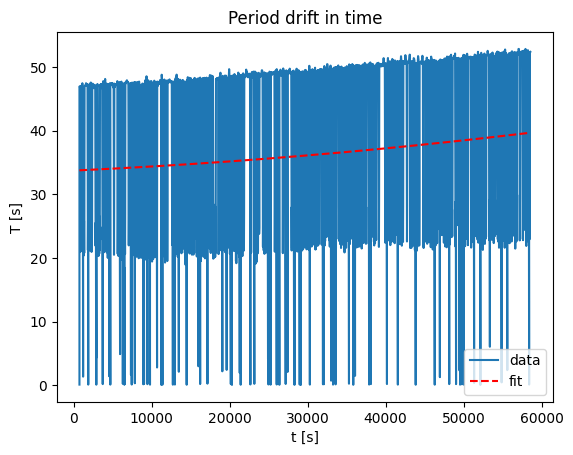

In [10]:
smooth_periods = period_fit()
plt.title('Period drift in time')
plt.xlabel('t [s]')
plt.ylabel('T [s]')
plt.plot(crossings, periods, label='data')
plt.plot(crossings, smooth_periods, c='r', ls='--', label='fit')
plt.legend()
#plt.ylim(45,48)
plt.show()

'Standard deviation of period = 14.7575 s'

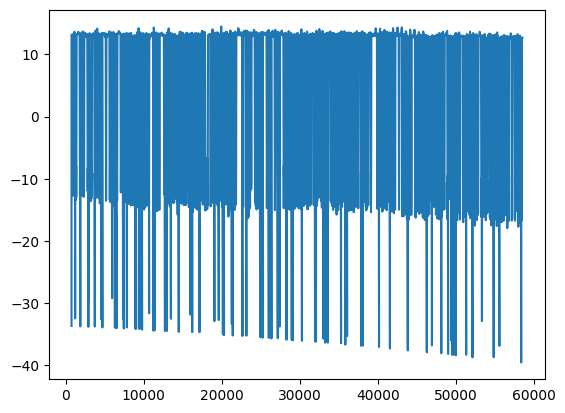

In [11]:
delta_T = periods-smooth_periods
plt.plot(crossings, delta_T)
f'Standard deviation of period = {np.std(delta_T):.4f} s'

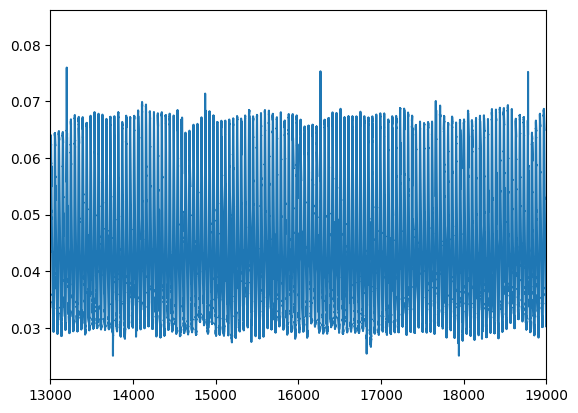

In [12]:

plt.plot(data['t'], data['I'])
plt.xlim(13000, 19000)
plt.show()

It follows that the phase response should be at least $3\sigma = 0.16\text{s} \approx 0.4\%$ of the period.